# Comportamiento emergente: juego de la vida de Conway

**Autor**: José A. Troyano.   **Última modificación:** 21/2/2018

Este _notebook_ inlcuye una sencilla implementación en Python del <A href='https://es.wikipedia.org/wiki/Juego_de_la_vida'>juego de la vida</A> de Conway. Este juego fue creado por el matemático inglés John Horton Conway en 1970. 

El juego se desarrolla sobre un tablero con cuadrículas (como el del ajedrez) que en teoría se extiende hasta el infinito. Cada celda tiene 8 celdas vecinas que son las que determinarán, en cada momento, su evolución. A partir de una configuración inicial (denominada semilla) el juego evoluciona solo de manera determinista. En cada paso de evolución, todas las celdas cambian simultáneamente siguiendo estas reglas:

- Una celda sin vida, con 3 celdas vecinas vivas, nace.
- Una celda con vida solo permanece viva si tiene 2 ó 3 celdas vecinas vivas.
- En el resto de casos, la celda no vivirá en la siguiente iteración.

El notebook está organizado en tres secciones:
1. Creación y visualización del universo
2. Las tres reglas del juego de la vida
3. Animación

La más importante es la segunda, que es la que recoge la esencia del juego. A pesar de ello es la más simple, con diferencia. Incluso sin concocer el lenguaje Python es muy fácil comprender cómo están programadas las reglas. Esta es, precisamente, la belleza del juego: cómo con algo tan simple se puede llegar a generar un comportamiento complejo.

### ¿Cómo usar el notebook?

El notebook está diseñado para que cualquier persona (aunque no tenga conocimientos de programación) pueda experimentar con distintas semillas e incluso crear sus propias semillas. He aquí unas breves instrucciones de uso:

- **Ejecución de las celdas de código**: Para ejecutar una celda de código del notebook (las celdas grises que tienen instrucciones escritas en el lenguaje Python) basta con _clicar_ en ella y pulsar 'Mayúsculas+Entrar' en el teclado. Una primera forma de usar el notebook es ejecutar todas las celdas de código una a una (al tiempo que se leen las explicaciones) y comprobar qué ocurre.

- **Explicaciones**: Hay dos tipos de explicaciones a lo largo del notebook: las celdas de texto (como esta que estás leyendo) y los comentarios en las celdas de código (empiezan por <code>#</code> o están incluidos entre <code>'''</code> y <code>'''</code>). Aunque no se tengan concimientos de programación, cualquier persona se puede hacer una idea de qué hace cada celda de código leyendo los comentarios.

- **Lectura de una semilla**: En la carpeta <code>./semillas/</code> hay una serie de ficheros que contienen distintas semillas codificadas de una forma muy simple con 0s y 1s. Para crear un universo a partir de una semilla basta con llamar a la función <code>lee_universo</code> indicándole el nombre del fichero correspondiente y guardar su resultado en una variable. Por ejemplo:

<code>        universo = lee_universo('./semillas/beacon.txt')</code>

- **La celda de código final de la sección 3**: En la última celda de código del notebook hay preparadas varias instrucciones como la anterior para probar cómo evolucionan diferentes semillas. Todas, salvo una, están desactivadas (empiezan por el carácter <code>#</code> para que la línea completa se interprete como un comentario). Para comprobar cómo evoluciona el juego con una semilla en concreto, solo hay que _descomentar_ su instrucción de lectura (quitando el <code>#</code> del principio), _comentar_ el resto de instrucciones de lectura (con un <code>#</code> al principio de todas ellas) y ejecutar la celda.

- **Creación de nuevas semillas**: Las semillas son ficheros de texto que pueden editarse con cualquier editor _plano_ (por ejemplo Notepad de Windows). Crear una nueva semilla es tan fácil como crear un nuevo fichero con un patrón de 0s y 1s. Desde la creación del juego se han descubierto muchísimos patrones con comportamientos interesantes. Se pueden encontrar muchos de ellos en esta <A href='http://conwaylife.com/wiki/Main_Page'>wiki</A>. Para probar una nueva semilla con el notebook, basta con crear un nuevo fichero para ella en el que se represente su patrón de 0s y 1s, y lanzar su simulación en la celda final del notebook.

Para empezar, ejecutaremos la siguiente celda de código en la que se _importan_ los elementos que necesitaremos en el resto del notebook:

In [1]:
%matplotlib notebook
from matplotlib import pylab as plt
from matplotlib.animation import FuncAnimation
from matplotlib import gridspec
import numpy as np

## 1. Creación y visualización del universo

En esta sección veremos las funciones para crear un universo a partir de una semilla, leer la semilla desde un fichero y mostrar gráficamente el estado de un universo. En el juego de la vida, los universos serán muy simlpes: matrices de 0 y 1. Una celda con vida se representará con un 1, y una celda sin vida se representará con un 0.

In [2]:
# Semilla beacon
#     - los 1 representan celdas con vida
#     - los 0 representan celdas sin vida
beacon =  [[1, 1, 0, 0],
           [1, 1, 0, 0],
           [0, 0, 1, 1],
           [0, 0, 1, 1]]

In [3]:
def crea_universo(semilla, lado_universo=None):
    ''' Crea un universo a partir de una semilla
    
    Recibe como entrada una semilla (un array numpy o simplemente una lista de listas de números)
    y el tamaño del lado del universo. Produce como salida una matriz numpy 2D con la semilla
    centrada en él.
    
    Se deben cumplir las siguientes condiciones:
    - La semilla debe estar rodeada al menos por un margen de anchura 1 de celdas sin vida (valor 0)
    - El lado máximo del universo es 100 para que las animaciones basadas en FuncAnimation no sean muy lentas
    '''
    filas, columnas = np.array(semilla).shape
    lado_semilla = max(filas, columnas)

    if lado_universo is None:
        lado_universo = lado_semilla + 2
    elif lado_universo > 100:
        print("No se permiten universos mayores que 100, la visualización sería muy lenta")
        lado_universo = 100
        
    universo = np.zeros((lado_universo, lado_universo))
    
    if lado_universo < lado_semilla + 2:      # Si la semilla no cabe en el universo
        print("El lado del universo es %d y debería ser al menos %d" % (lado_universo, lado_semilla+2))
    else:
        margen = (lado_universo-lado_semilla)//2
        universo[margen:margen+filas, margen:margen+columnas] = np.array(semilla)
    return universo

In [4]:
# Test de la función crea_universo
universo = crea_universo(beacon)
print(universo)

[[0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [5]:
def lee_universo(fichero, lado_universo=None):
    ''' Crea un universo a partir de una semilla almacenada en un fichero
    '''
    semilla = np.genfromtxt(fichero, delimiter=',')
    return crea_universo(semilla, lado_universo)

In [6]:
# Test de la función lee_universo
universo = lee_universo('./semillas/beacon.txt')
print(universo)

[[0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [7]:
def celdas_ocupadas(universo):
    ''' Calcula las celdas con vida en un universo
    
    Toma como entrada un universo (array numpy 2D) y produce como salida dos listas de números
    con las coordenadas x e y de las celdas con vida.
    Esta función es necesaria para la visualización con el método plot de matplotlib ya que
    requiere los datos de los puntos a visualizar en este formato.
    '''
    eje_x, eje_y = universo.shape
    celdas = []
    for x in range(eje_x):
        for y in range(eje_y):
            if universo[x, y] == 1:
                celdas.append((y,x))
    xs = [x for x,_ in celdas]
    ys = [y for _,y in celdas]
    return (xs,ys)


def muestra_universo(universo):
    ''' Genera la gráfica que representa el universo
    
    Construye dos marcos, uno pequeño para la semilla y otro grande donde, posteriormente, se
    llevará a cabo la animación.
    
    Se devuelven las variables fig, celdas, texto_iteracion y texto_poblacion, para que puedan
    ser usadas posteriormente en la animación gráfica con FuncAnimation.
    '''
    # Creación de la figura con dos marcos (para la semilla y la simulación)
    fig = plt.figure(figsize=(8,6))
    plt.axis('equal')
    gs = gridspec.GridSpec(3, 4)
    ax0 = plt.subplot(gs[0,0])
    ax1 = plt.subplot(gs[:,1:])
    (xs,ys) = celdas_ocupadas(universo)
    
    # Composición del marco para la semilla
    ax0.axis([-0.5,len(universo)-0.5,-0.5,len(universo)-0.5])
    ax0.invert_yaxis()
    ax0.set_yticklabels([])
    ax0.set_xticklabels([])
    ax0.plot(xs,ys, ls="", marker="s", color="blue", markersize=5*12/len(universo))
    ax0.text(0.01, -0.15, 'Población: %d' % len(xs), transform=ax0.transAxes)

    # Composición del marco para la simulación
    ax1.axis([-0.5,len(universo)-0.5,-0.5,len(universo)-0.5])
    ax1.invert_yaxis()
    ax1.set_yticklabels([])
    ax1.set_xticklabels([])
    celdas, = ax1.plot(xs,ys, ls="", marker="s", color="blue", markersize=5*45/len(universo))
    texto_iteracion = ax1.text(0.01, -0.05, 'Iteración 0', transform=ax1.transAxes)
    texto_poblacion = ax1.text(0.01, -0.10, 'Población: %d' % len(xs), transform=ax1.transAxes)
    return fig, celdas, texto_iteracion, texto_poblacion

<IPython.core.display.Javascript object>


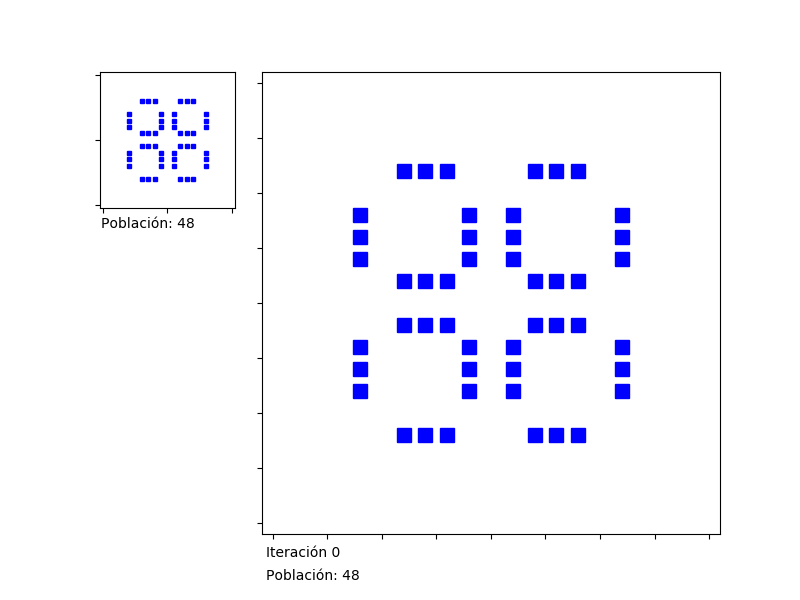

(<matplotlib.figure.Figure at 0x51169d0>,
 Text(0.01,-0.05,'Iteración 0'),
 Text(0.01,-0.1,'Población: 48'))

In [8]:
# Test de la función muestra_universo
universo = lee_universo('./semillas/pulsar.txt', 21)
muestra_universo(universo)

## 2. Las tres reglas del juego de la vida
En esta sección se impementan las dos funciones principales del juego de la vida:
- **sobrevive**: que determina si una celda seguirá viva, o no, en la próxima iteración
- **evoluciona**: que calcula el nuevo estado del universo completo en la próxima iteración

In [9]:
def sobrevive(f, c, universo):
    ''' Determina si una celda seguirá viva en la siguiente iteración
    
    Toma como entrada la fila, y la columna de una celda, y un universo. Produce como salida
    un 1 o un 0 dependiendo del nuevo estado que corresponda a la celda.
    
    Es el núcleo del juego de la vida, son las tres reglas que definión Conway en 1970.
    '''
    vecinos = np.sum(universo[f-1:f+2,c-1:c+2])-universo[f,c]    # Número de vecinos

    if universo[f,c]==0 and vecinos==3:     # Una celda muerta con tres vecinos nace
        return 1                         
    if universo[f,c]==1 and 2<=vecinos<=3:  # Una celda viva con dos o tres vecinos se mantiene viva
        return 1
    return 0                                # En el resto de casos, no hay vida en la celda


def evoluciona(universo):
    ''' Calcula un paso de evolución de un universo
    
    Toma como entrada un universo y produce como salida otro universo en el que todas las celdas
    han evolucionado a su siguiente estado.
    '''
    filas, columnas = universo.shape
    nuevo_universo = np.zeros((filas, columnas))
    for f in range(filas):
        for c in range(columnas):
            nuevo_universo[f,c] = sobrevive(f, c, universo)
    return(nuevo_universo)

<IPython.core.display.Javascript object>


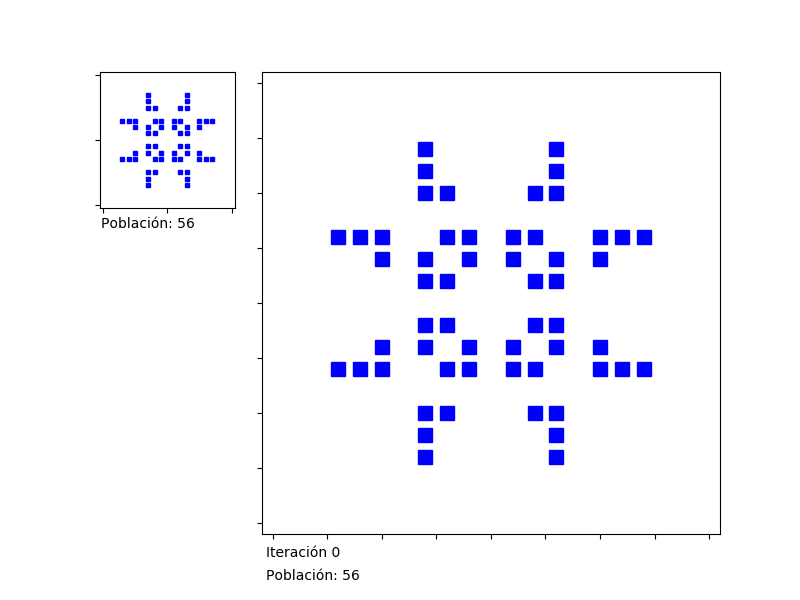

(<matplotlib.figure.Figure at 0x9b88cd0>,
 Text(0.01,-0.05,'Iteración 0'),
 Text(0.01,-0.1,'Población: 56'))

In [10]:
# Test de la función evoluciona
universo = lee_universo('./semillas/pulsar.txt', 21)
universo = evoluciona(universo)
muestra_universo(universo)

## 3. Animación

Python (y matplotlib) proporcionan distintas formas de generar animaciones. En esta implementación se ha escogido la clase <code>FuncAnimation</code> que permite mostrar la animación al mismo tiempo que se está ejecutando el programa, para que la experiencia sea más _interactiva_. Para simulaciones más largas lo razonable es generar la simulación _offline_ y producir un video a partir de ella (usando la clase <code>ArtistAnimation</code>). 

Usaremos un esquema basado en la función <code>siguiente_iteracion</code> en la que el universo avanza un paso y se componen los elementos variables de la animación. Además de la animación gráfica se muestran tres indicadores numéricos:
- Población en semilla: número de celdas con vida en la semilla (es un valor constante)
- Iteración: número de iteraciones de la simulación
- Población en simulación: número de celdas con vida en cada iteración

En la última celda de código hay disponibles varias instrucciones de lectura de universo con distintos ficheros semilla. Para probar una de ellas, quitar el carácter <code>#</code> del principio y ponérselo al resto. 

In [11]:
def siguiente_iteracion(i):
    ''' Calcula un 'fotograma' de la secuencia de evolución
    
    Será usada por la clase FuncAnimation de matplotlib para generar una secuencia de
    imágenes que de lugar a la animación.
    Además de instrucciones para componer la salida gráfica animada, inlcuye una llamada a
    la función 'evoluciona' que es la que (de forma secuencial) va cambiando el estado del
    universo.
    
    El control de la animación lo lleva FuncAnimation y, para no complicar el paso de parámetros,
    usaremos la variable global 'universo' para que su estado sea visible de una iteración a otra.
    A fin de cuentas, no hay nada más global que el universo ;)
    '''
    global universo
    universo = evoluciona(universo)
    xs,ys = celdas_ocupadas(universo)
    celdas.set_data(xs,ys)
    texto_iteracion.set_text('Iteración: %d' % i)
    texto_poblacion.set_text('Población: %d' % len(xs))
    return celdas, texto_iteracion, texto_poblacion

<IPython.core.display.Javascript object>


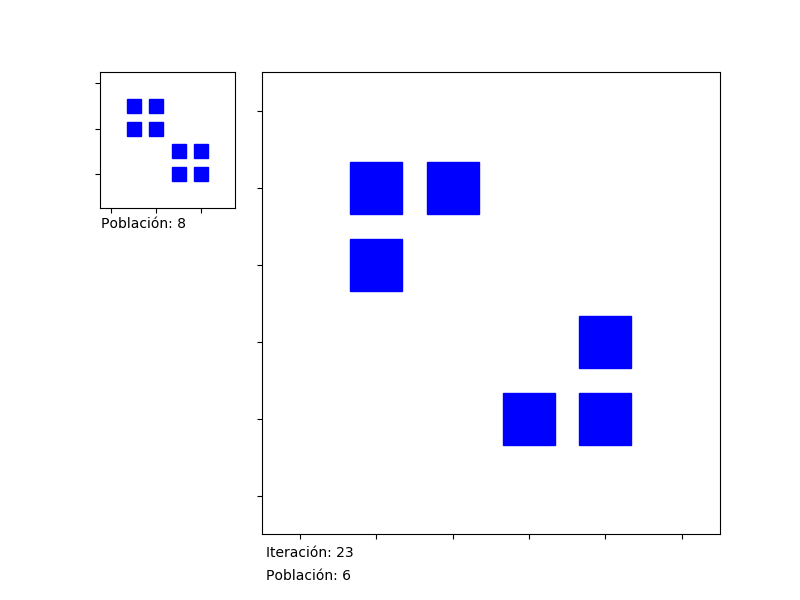

In [13]:
# Descomentar cada instrucción de lectura para probar las distintas semillas
# Si se activa una ventana con 'scroll', hacer click en el área gris de la izquierda para expandirla

universo = lee_universo('./semillas/beacon.txt')

#universo = lee_universo('./semillas/parpadeador.txt')
#universo = lee_universo('./semillas/sapo.txt')

#universo = lee_universo('./semillas/planeador.txt', 50)
#universo = lee_universo('./semillas/nave.txt', 50)

#universo = lee_universo('./semillas/pulsar.txt')

#universo = lee_universo('./semillas/r-pentomino.txt')
#universo = lee_universo('./semillas/r-pentomino.txt', 100)

#universo = lee_universo('./semillas/diehard.txt', 35)
#universo = lee_universo('./semillas/pistola-gosper.txt')


# Creación de la primera imagen
fig, celdas, texto_iteracion, texto_poblacion = muestra_universo(universo)
# Generación de la animación. Con 'frames' se puede cambiar el número de iteraciones 
anim = FuncAnimation(fig, siguiente_iteracion, frames=200, repeat=False)